# Hotel Resevation Cancellation Prediction

The aim of this project to predict the possible reservations that are going to cancelled by the customers by analyzing various features and variables associated with the reservation.

### Context
The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

### Data Dictionary

| Column Name | Description |
| --- | --- |
|Booking_ID|unique identifier of each booking|
|no_of_adults|number of adults|
|no_of_children|number of children|
|no_of_weekend_nights|number of weekend nights  (Saturday or Sunday) the guest stayed or booked to stay at the hotel|
|no_of_week_nights|number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel|
|meal_type|meal type booked by the customer|
|required_car_parking_spaces| Does the customer require a car parking space? (0 - No, 1- Yes)|
|lead_time|Number of days between the date of booking and the arrival date|
|arrival_year|Year of arrival|
|arrival_month|Month of arrival|
|arrival_date|Date of arrival|
|market_segment|Market segment designation|
|repeated_guest Is the customer a repeated guest?| (0 - No, 1- Yes)|
|no_previous_cancellations| Number of previous bookings that were canceled by the customer prior to the current booking|
|previous_bookings_not_canceled|Number of previous bookings not canceled by the customer prior to the current booking|
|avg_price_per_room|Average price per day of the reservation; prices of the rooms are dynamic. (in euros)|
|no_of_special_requests|Total number of special requests made by the customer (e.g. high floor, view from the room, etc)|
|booking_status|Flag indicating if the booking was canceled or not|

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [97]:
data = pd.read_csv(r'F:\JUPTER NOTEBOOK\RAVI SHANKAR PROJECTS\HOTEL RESERVATIONS\Hotel Reservations.csv')

In [98]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Data Preprocessing Part 1

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [89]:
data.shape

(36275, 19)

In [90]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [91]:
data.duplicated().sum()

0

In [92]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [100]:
data['date of arrival'] = data['arrival_year'].astype(str) + '/' + data['arrival_month'].astype(str) \
+ '/' + data['arrival_date'].astype(str)

data['date of arrival'] = pd.to_datetime(data['date of arrival'], errors='coerce')

In [101]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date of arrival
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11


In [102]:
#dropping the columns
data.drop(columns=['arrival_date', 'arrival_month', 'arrival_year'], inplace=True)

In [103]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date of arrival
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Online,0,0,0,90.95,2,Canceled,2018-10-17
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,Canceled,2018-04-21


In [36]:
data.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
date of arrival                             0
dtype: int64

In [37]:
cat_cols = data.select_dtypes(include = 'object').columns

In [38]:
num_cols = data.select_dtypes(exclude = 'object').columns

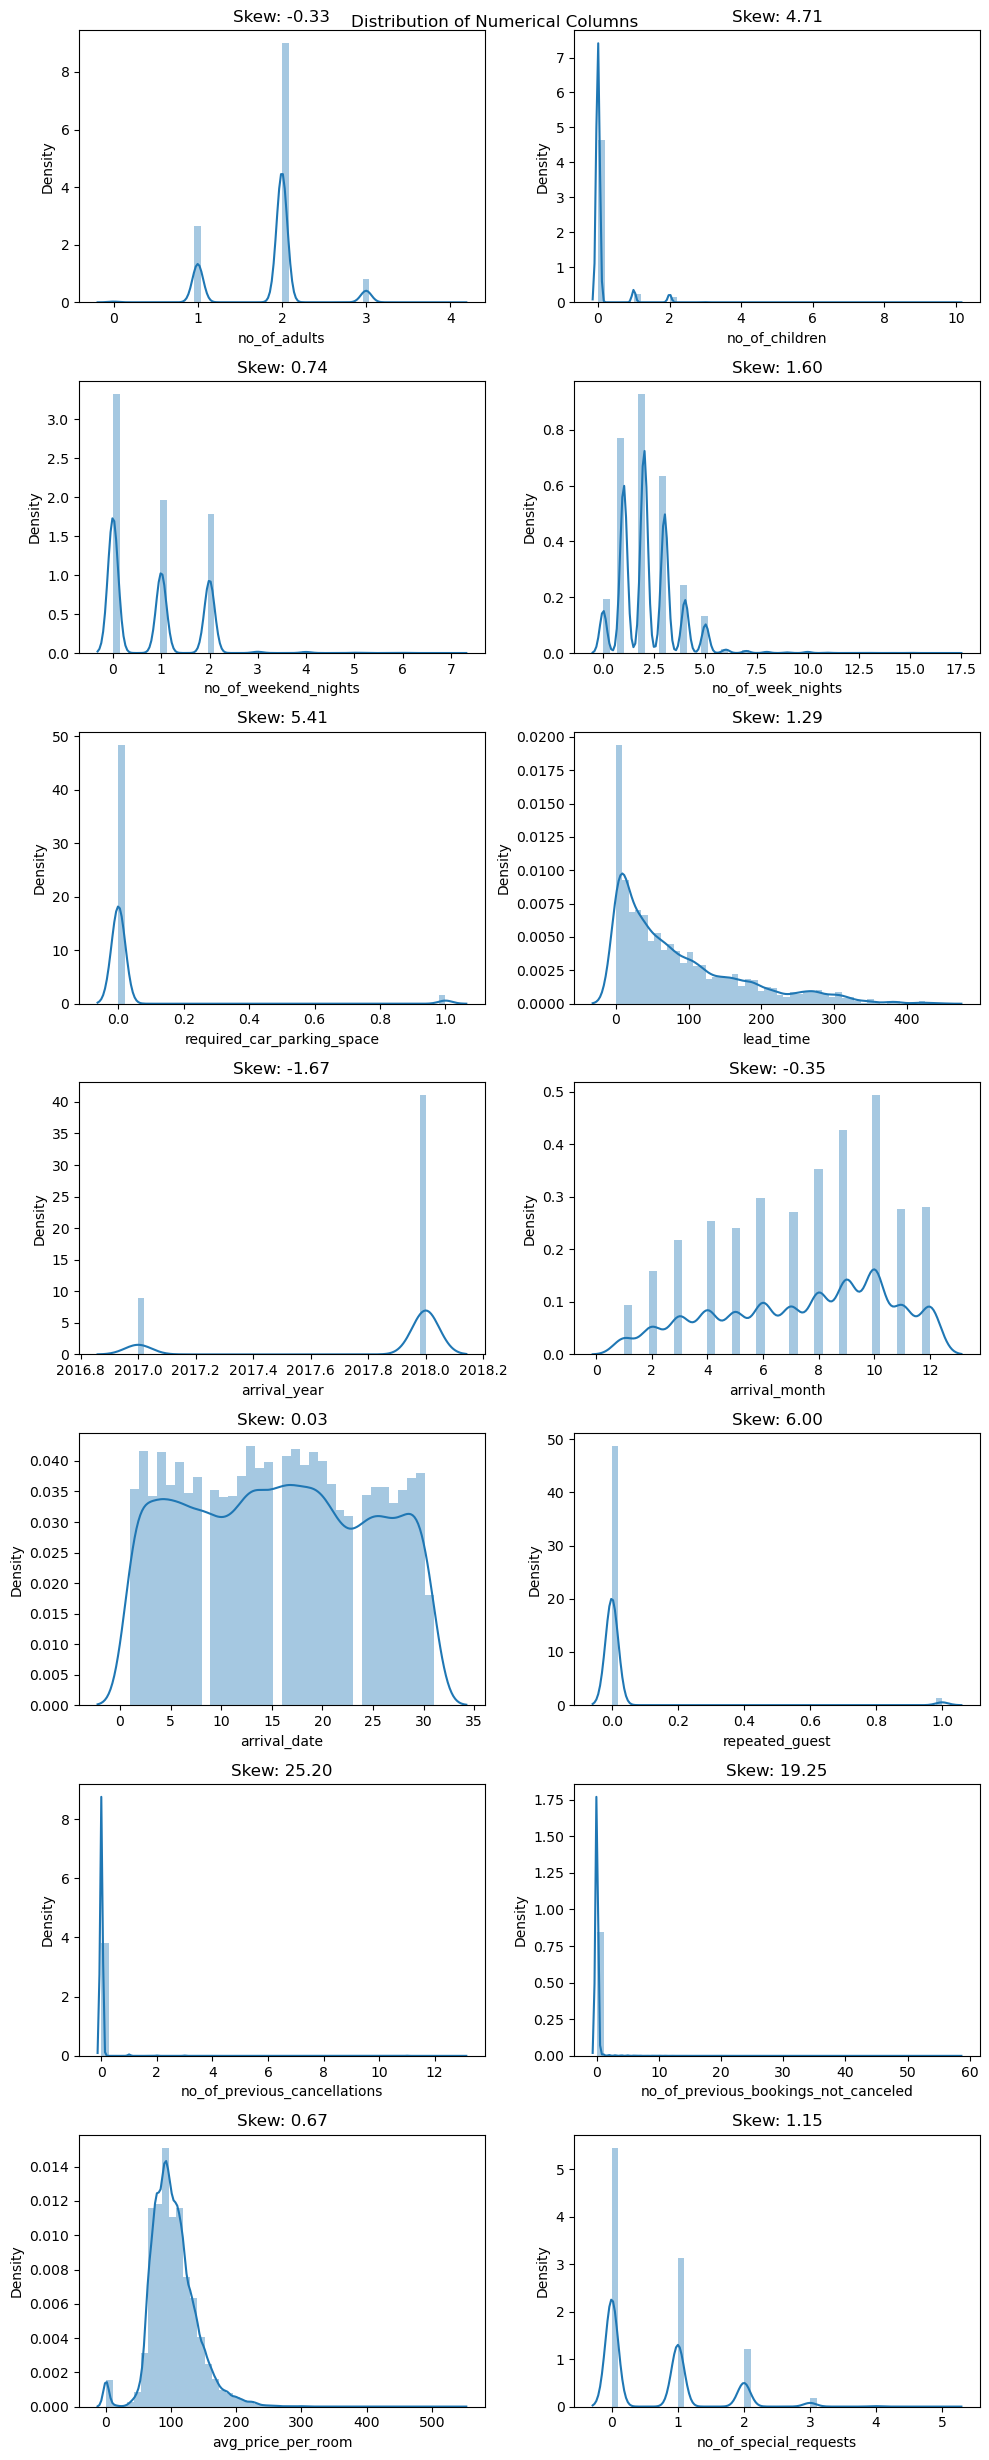

In [150]:
plt.figure(figsize=(10,25))
r = 7
c = 2
a =1
for i in num_cols:
    plt.subplot(r,c,a)
    sns.distplot(data[i])
    plt.title('Skew: %.2f'%(data[i].skew()))
    a+=1
plt.suptitle('Distribution of Numerical Columns')
plt.tight_layout()
plt.show()

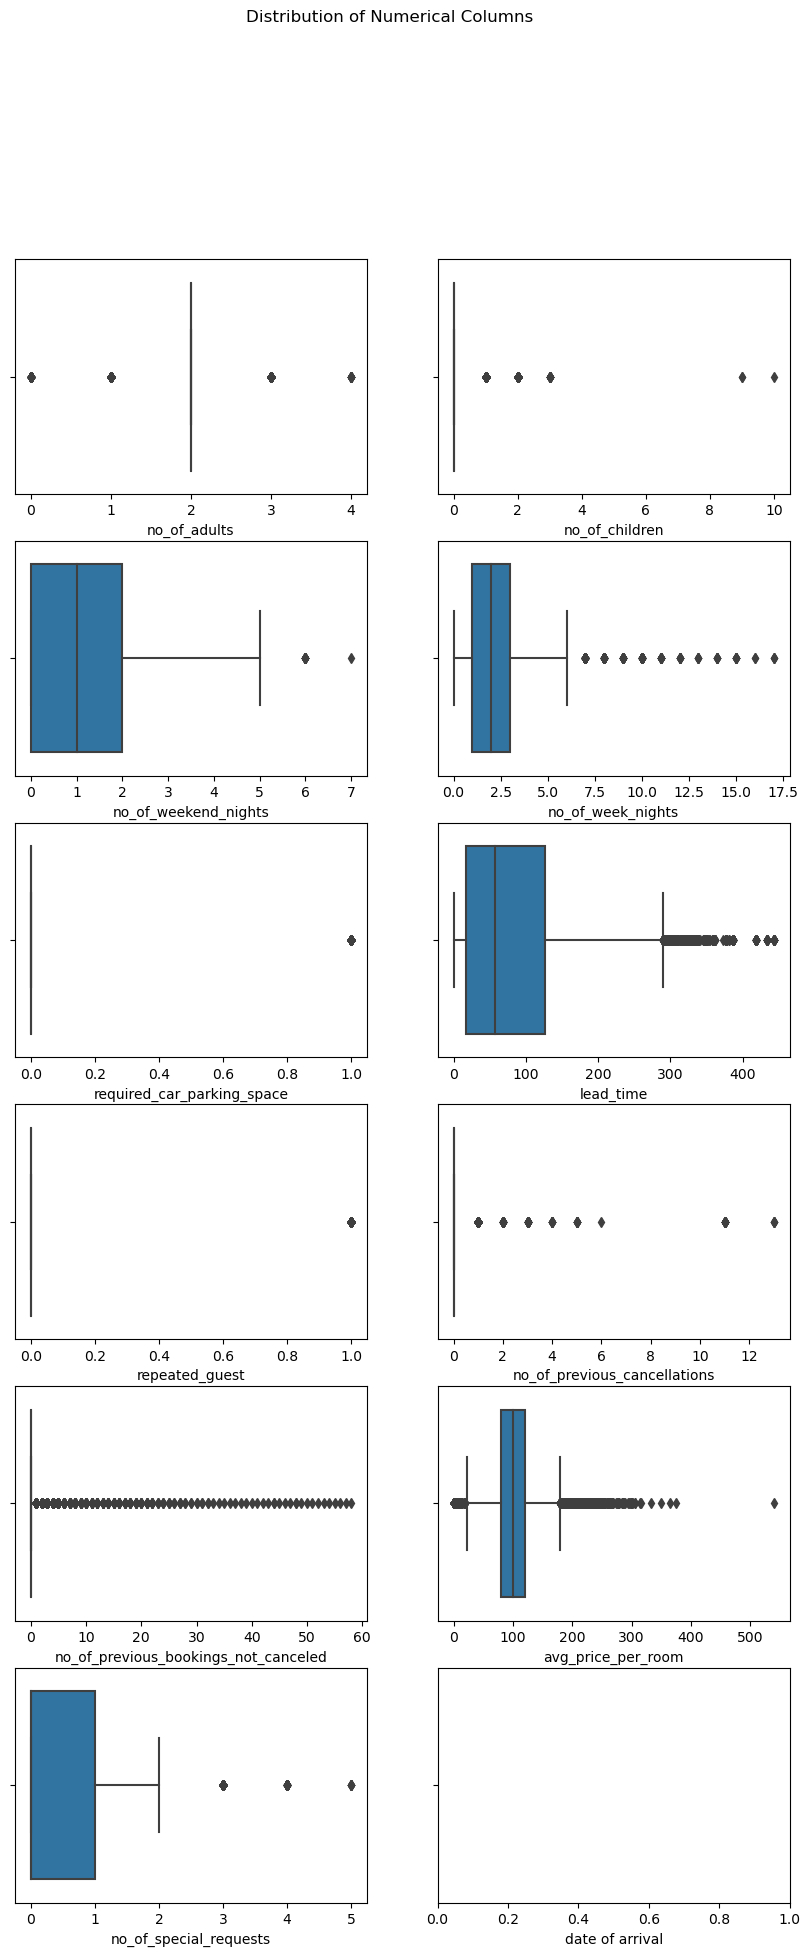

In [40]:
plt.figure(figsize=(10,25))
r = 7
c = 2
a =1
for i in num_cols:
    plt.subplot(r,c,a)
    sns.boxplot(data[i])
    a+=1
plt.suptitle('Distribution of Numerical Columns')
plt.show()

In [152]:
data['avg_price_per_room'].replace(0,data['avg_price_per_room'].mean(), inplace = True)

In [153]:
data.drop(data[data['no_of_adults']==0].index, inplace = True)

## EDA

In the exploratory data analysis, I will be visualizing the data to get a better understanding of the data and to see if there are any trends or patterns in the data. First I will begin with looking at the distribution of the data and then I will look at the relationship between the independent variables and the target variable.

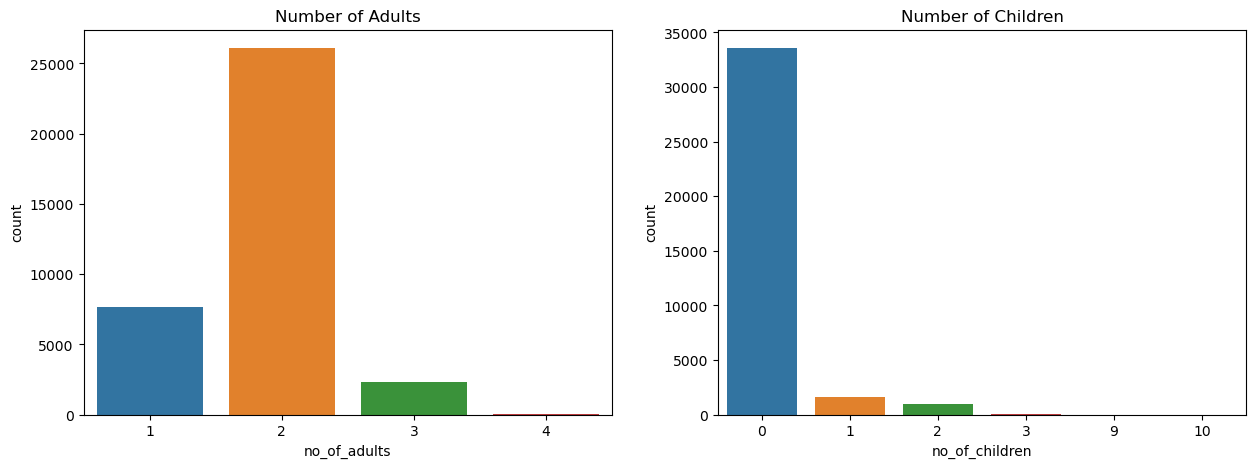

In [154]:
figure, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot( x = 'no_of_adults', data = data, ax =axes[0]).set_title('Number of Adults')
sns.countplot( x = 'no_of_children', data = data, ax=axes[1]).set_title('Number of Children')
plt.show()

**As we can see from the plot that 2 adults with no children refer to couple which has majority of bookings then after that
1 adults with no children can possibly inferred that this booking is made for business purposes. Couples with children has the least
booking**

## Time spent at Hotel

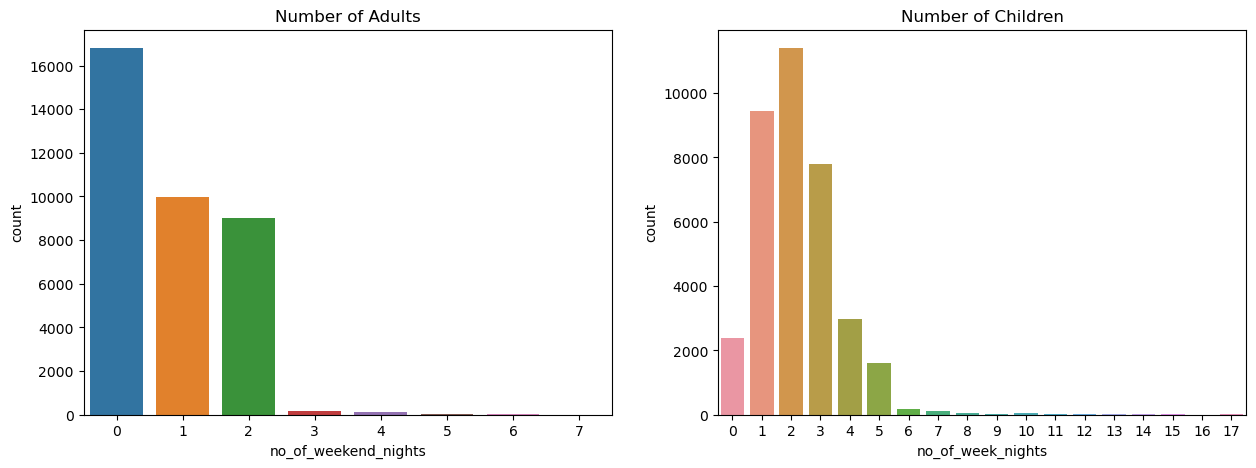

In [155]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot( x = 'no_of_weekend_nights', data = data).set_title('Number of Adults')

plt.subplot(1,2,2)
sns.countplot( x = 'no_of_week_nights', data = data).set_title('Number of Children')

plt.show()

These graphs shows that most of the guest reserved to stay at the hotel on non weekend nights. The majority of the hotel bookings were for 1 or 2 nights. However, considerable number of bookings take place for the weekends. From this I assume that the bookings for the weekends were for vacation and the those for the weekdays were for business trips or for other reasons.



## Services

Text(0.5, 1.0, 'Number of Special Guest')

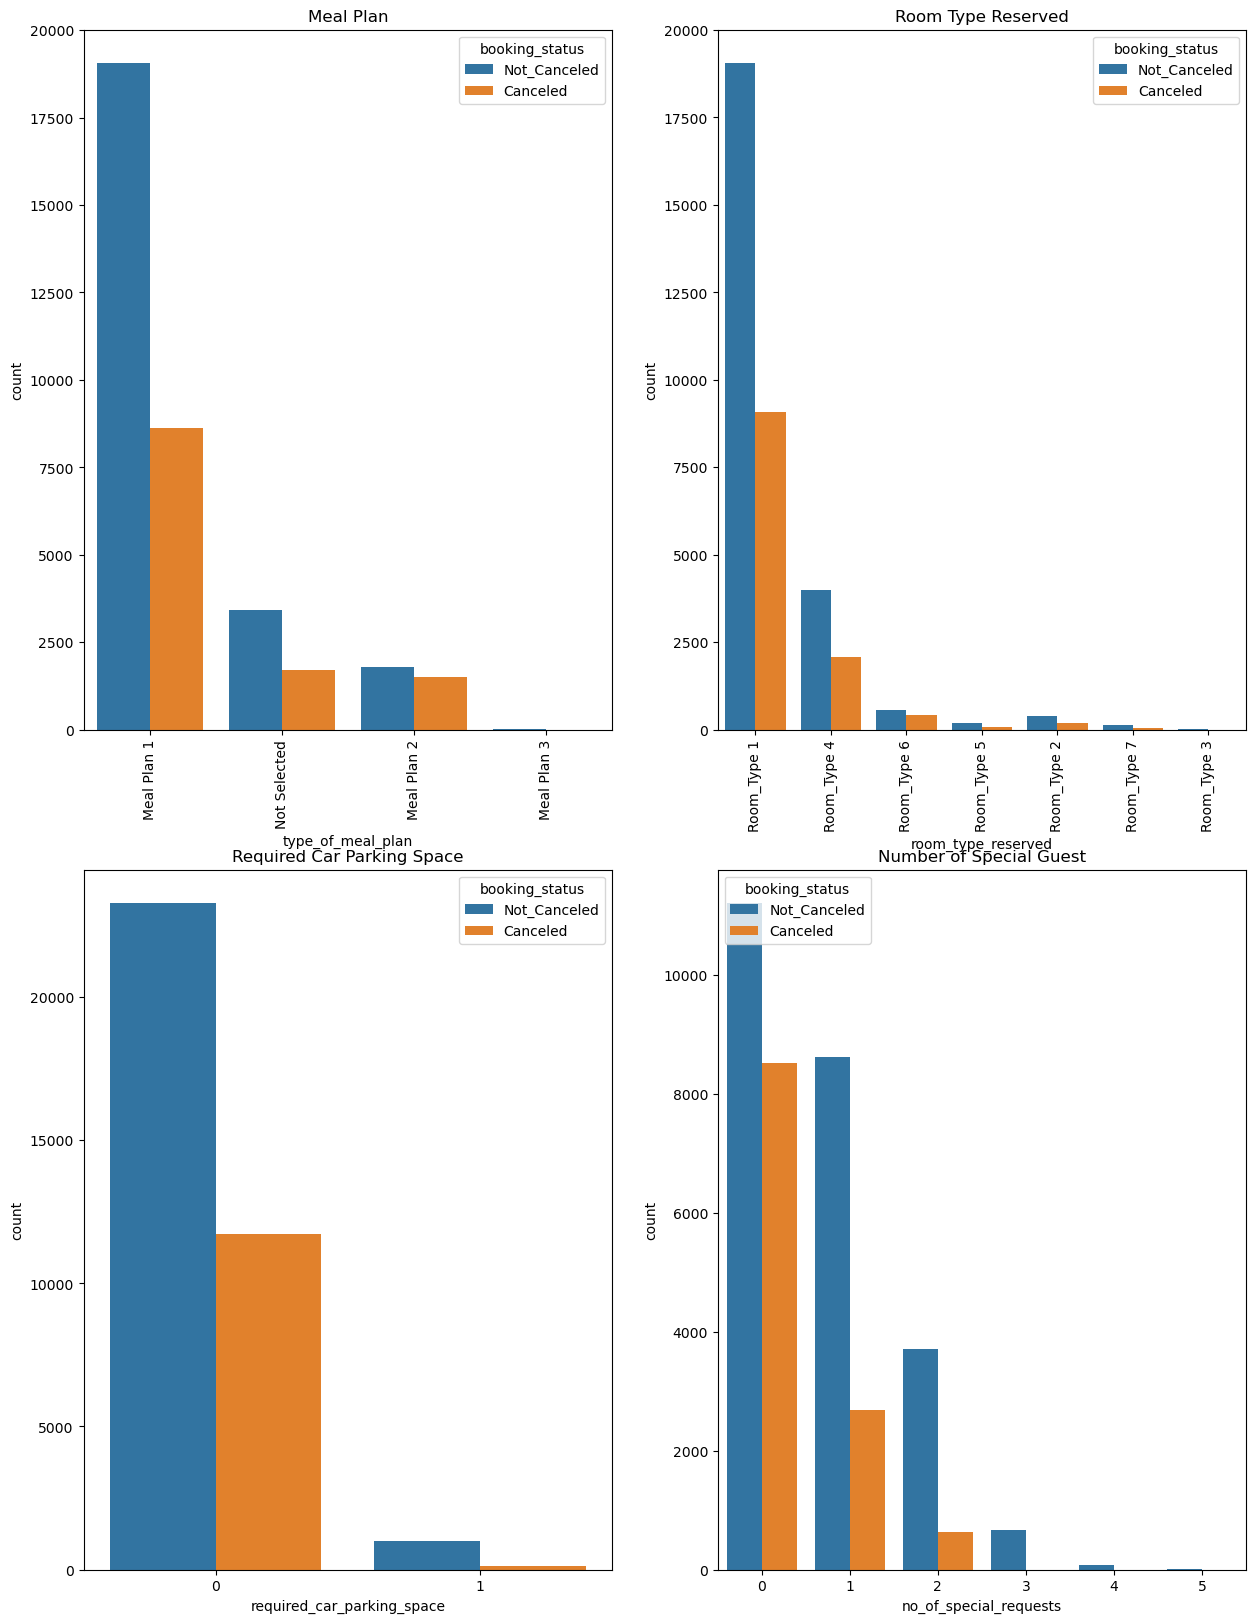

In [156]:
plt.figure(figsize=(15,20))

plt.subplot(2,2,1)
sns.countplot(x = 'type_of_meal_plan', data = data, hue = 'booking_status').set_title('Meal Plan')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x = 'room_type_reserved', data = data, hue = 'booking_status').set_title('Room Type Reserved')
plt.xticks(rotation = 90)

plt.subplot(2,2,3)
sns.countplot(x = 'required_car_parking_space', data = data, hue = 'booking_status').set_title('Required Car Parking Space')

plt.subplot(2,2,4)
sns.countplot(x = 'no_of_special_requests', data = data, hue = 'booking_status').set_title('Number of Special Guest')

In the above graphs, we can see that the ratio of cancelled and not cancelled reservations is almost same for all the services. Therefore, I can conclude that the services provided by the hotel does not have any impact on the reservation cancellation.

# Lead time (days between date of reservation and date of arrival)

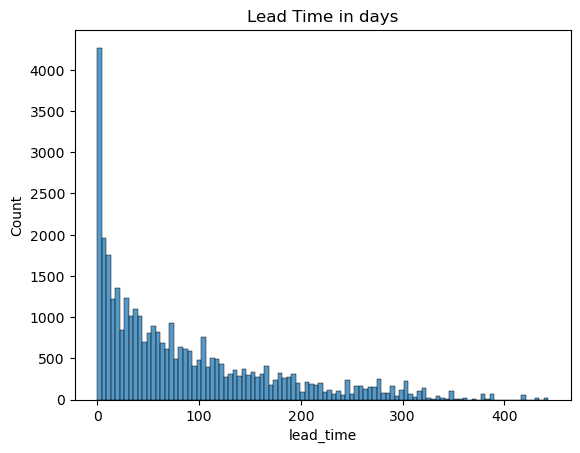

In [157]:
sns.histplot(x = 'lead_time', data = data, bins=100).set_title('Lead Time in days')
plt.show()

This graph shows that significant number of reservations were made just one day before or on the day of arrival. In addtion to that most of the reservations were made 1 to 2 weeks before the date of arrival. However, there were also reservations made 2-3 months before the date of arrival. From this histogram, I made a hypothesis that, the guest who have lead time very less are less likely to cancel the reservation as compared to the guest who have more lead time.

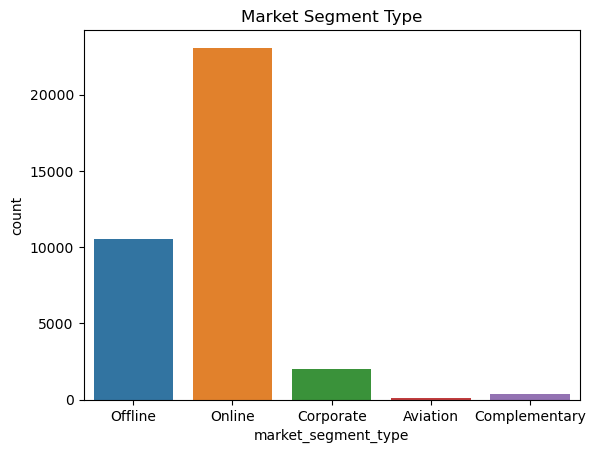

In [158]:
sns.countplot(x = 'market_segment_type', data = data).set_title('Market Segment Type')
plt.show()

This graph shows the major gateways through which reservations were made at the hotel. Makority of the reservations were made through online platforms which means the hotel company has more presence on travel booking platforms. The second most common way of booking was through offline, which could be on arrival at the hotel or through a travel agent. The third most common way of booking was corporate, which could be through a company. Vert few of the bookings were made by aviation companies which highlights possibility of an airport near the hotel.

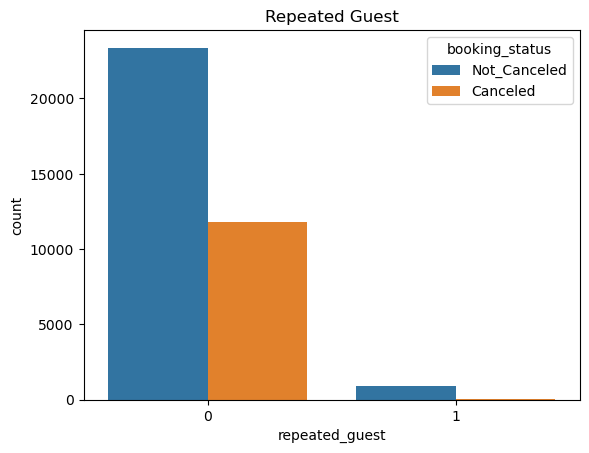

In [159]:
sns.countplot(x = 'repeated_guest', data = data, hue = 'booking_status').set_title('Repeated Guest')
plt.show()

This graph shows the market segment of reservations and cancellation. Here most of the reservations are made through online platforms and thus it has the most number of cancellations. The second most common market segment is offline, which has the second most number of cancellations.

Text(0.5, 1.0, 'Average Room Price')

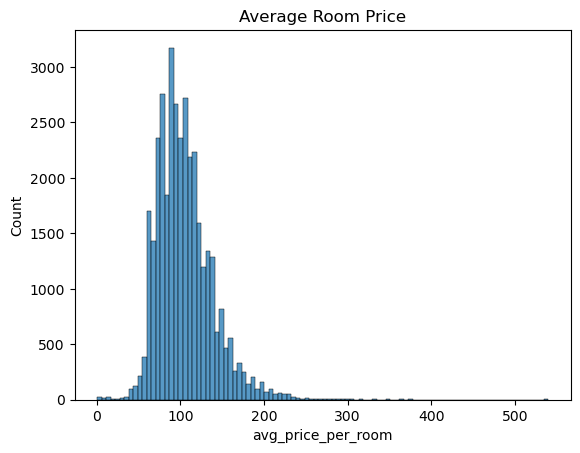

In [160]:
sns.histplot(x = 'avg_price_per_room', data = data, bins = 100).set_title('Average Room Price')

This graph shows the distribution of the room price. Majority of the reservations made had room price between 75 to 150. Very few of the reservations had room price more than 200.

In [104]:
df_2017 = data[data['date of arrival'].dt.year == 2017]
df_2018 = data[data['date of arrival'].dt.year == 2018]

Text(0.5, 1.0, 'Cancellation by day of week in 2018')

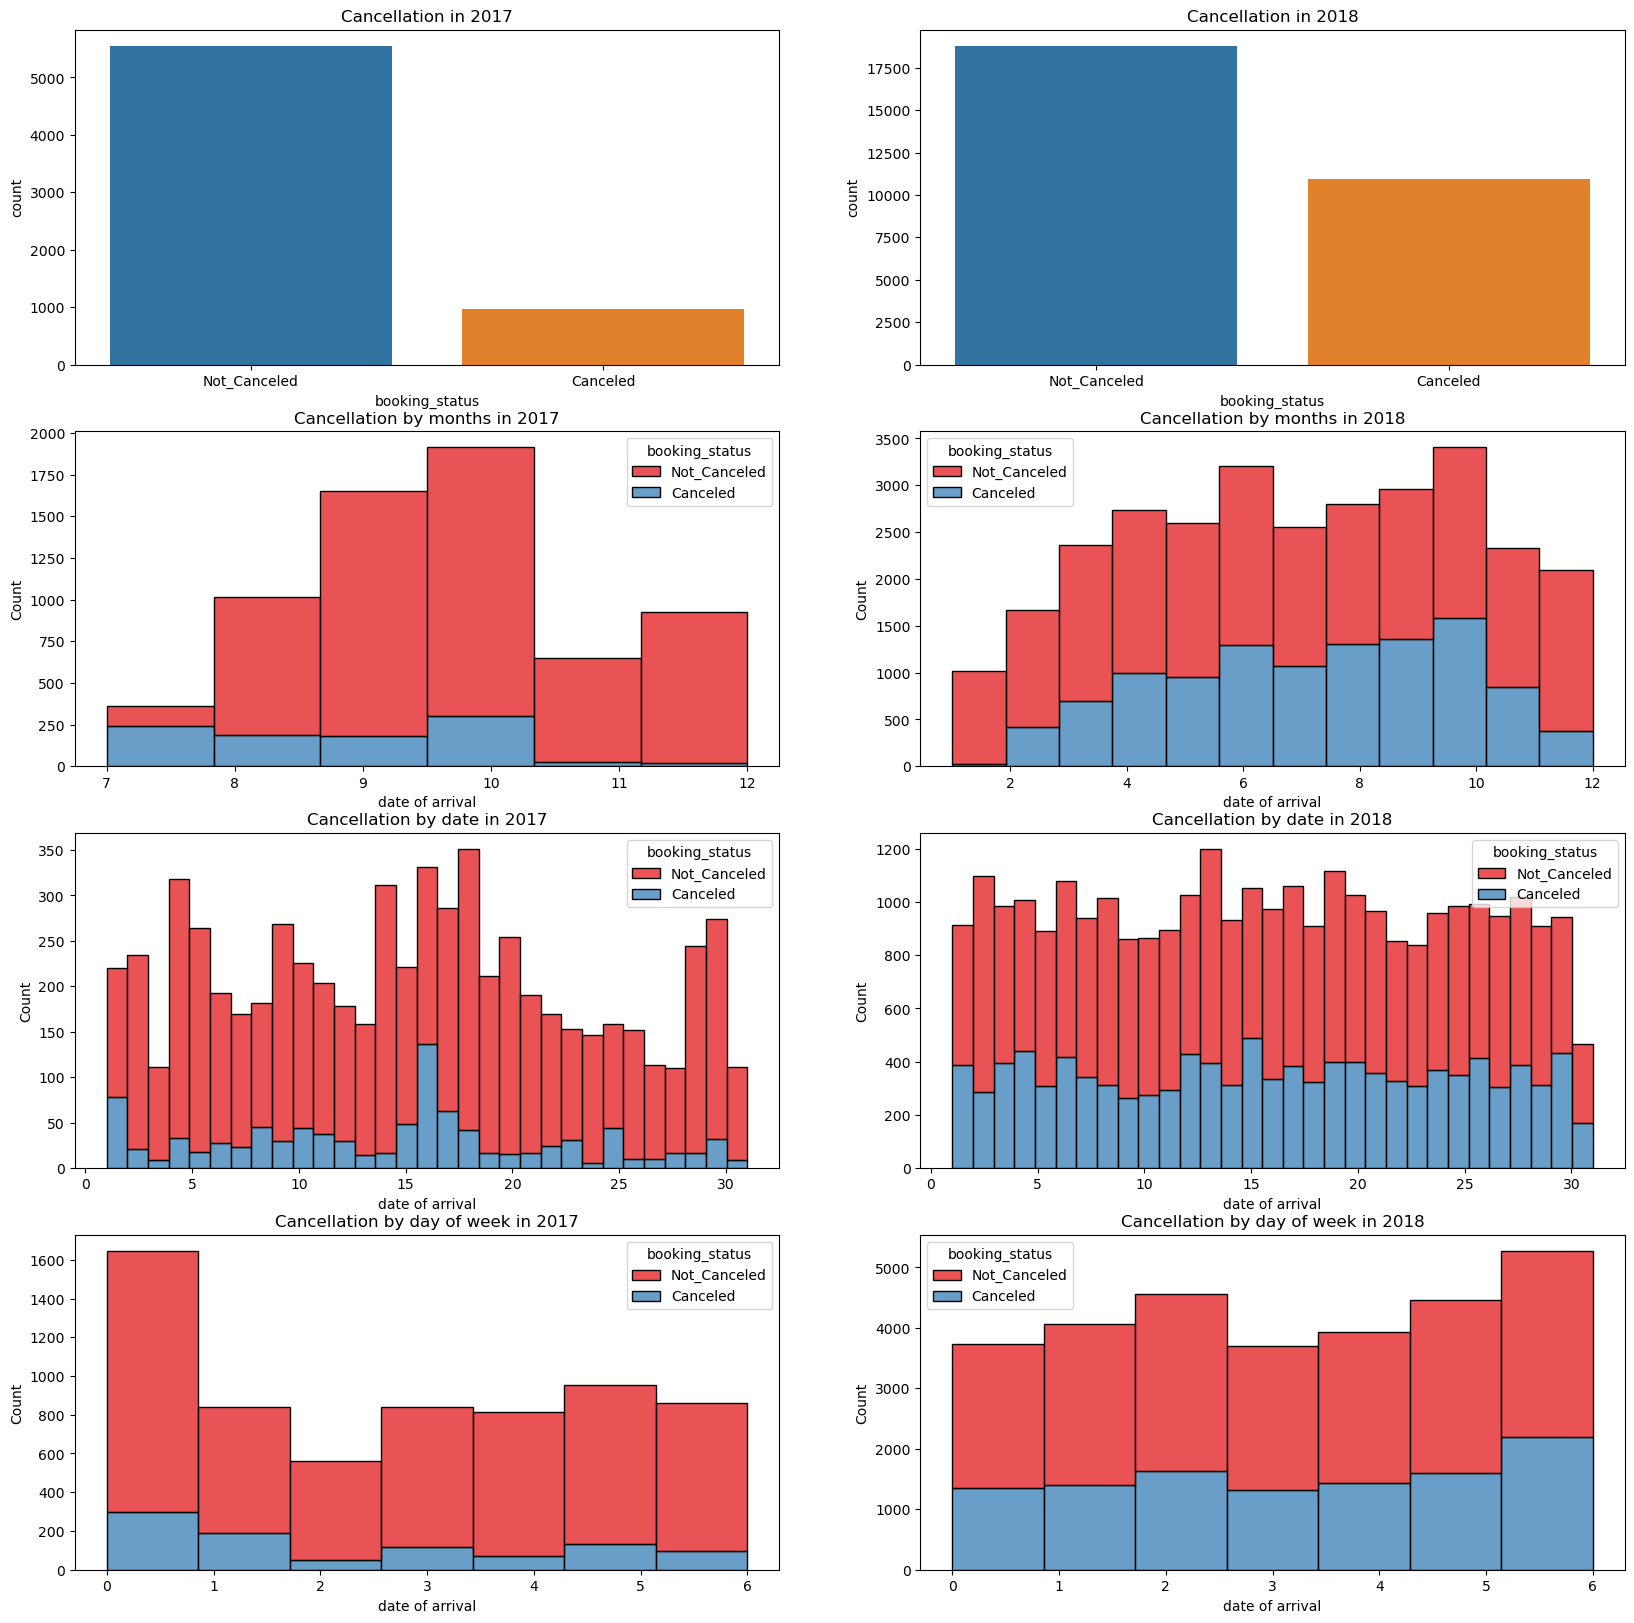

In [109]:
fig,ax = plt.subplots(4,2,figsize=(20,20))

# year wise
sns.countplot(x = df_2017['booking_status'], data = df_2017, ax=ax[0,0]).set_title('Cancellation in 2017')
sns.countplot(x = df_2018['booking_status'], data = df_2018, ax=ax[0,1]).set_title('Cancellation in 2018')

# month wise
sns.histplot(x = df_2017['date of arrival'].dt.month, data = df_2017, ax=ax[1,0], bins=6, hue = df_2017['booking_status'], palette = 'Set1', multiple = 'stack').set_title('Cancellation by months in 2017')
sns.histplot(x = df_2018['date of arrival'].dt.month, data = df_2018, ax=ax[1,1], bins=12, hue = df_2018['booking_status'], palette = 'Set1', multiple ='stack').set_title('Cancellation by months in 2018')

# date wise
sns.histplot(x = df_2017['date of arrival'].dt.day, data = df_2017, ax=ax[2,0], bins=31, hue = df_2017['booking_status'], palette = 'Set1', multiple='stack').set_title('Cancellation by date in 2017')
sns.histplot(x = df_2018['date of arrival'].dt.day, data = df_2018, ax=ax[2,1], bins=31, hue = df_2018['booking_status'], palette = 'Set1', multiple ='stack').set_title('Cancellation by date in 2018')

# day of week wise
sns.histplot(x = df_2017['date of arrival'].dt.dayofweek, data = df_2017, ax=ax[3,0], bins=7, hue = df_2017['booking_status'], palette = 'Set1', multiple = 'stack').set_title('Cancellation by day of week in 2017')
sns.histplot(x = df_2018['date of arrival'].dt.dayofweek, data = df_2018, ax=ax[3,1], bins=7, hue = df_2018['booking_status'], palette = 'Set1', multiple = 'stack').set_title('Cancellation by day of week in 2018')

The above graphs visualizes the reservation cancellation based on the dates the reservations were made. As we know that dataset mostly has reservations from 2018, despite of that, the number of reservations cancelled in 2018 is way higher than 2017. In 2017, nearly 5500 reservations were not cancelled and nearly 1000 where cancelled. However in 2018, 17500 reservations were not cancelled and more than 10000 reservations were cancelled. This shows that rate of reservation cancellation was much higher in 2018

Coming to the reservation cancellation according to the months, in 2017 reservations made in July and October had the highest. In addtion to that July had the least number of reservations made but still it has highest cancellation, which points some particular reason, not specified by the data. In 2018, June and October had the highest number of reservations made.

Now, we will look at the reservation cancellations by date of the month. In 2017, most reservations were cancelled for 16th and peculiarly on 1st of the month. In 2018, the number of cancellations were more in second and first week.

Coming to the day wise cancellation, in 2017 Sundays had the highest number of cancellations. In 2018, Saturdays had the highest number of cancellations.

# Data Preprocessing Part 2

In [28]:
cols = ['lead_time', 'avg_price_per_room']

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [29]:
data.drop(['Booking_ID'], axis=1, inplace=True)

In [30]:
data.drop(columns=['date of arrival'], inplace=True)

In [31]:
data.drop(columns=['arrival_year', 'arrival_month', 'arrival_date'], inplace=True)

In [32]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,Canceled


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()

col = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

for i in col:
    le.fit(data[i])
    data[i] = le.transform(data[i])

In [35]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85,4,0,0,0,167.80,1,1
36271,2,0,1,3,0,0,0,228,4,0,0,0,90.95,2,0
36272,2,0,2,6,0,0,0,148,4,0,0,0,98.39,2,1
36273,2,0,0,3,3,0,0,63,4,0,0,0,94.50,0,0


In [36]:
from sklearn.preprocessing import StandardScaler
#standardizing the data
scaler = StandardScaler()
data[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(data[['lead_time', 'avg_price_per_room']])

In [37]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,2.019649,3,0,0,0,-1.372303,0,1
1,2,0,2,3,3,0,0,-0.986921,4,0,0,0,0.157815,1,1
2,1,0,2,1,0,0,0,-1.041836,4,0,0,0,-1.555859,0,0
3,2,0,0,2,0,0,0,1.841177,4,0,0,0,-0.087415,0,0
4,2,0,1,1,3,0,0,-0.396590,4,0,0,0,-0.289326,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,0.111369,4,0,0,0,2.401596,1,1
36271,2,0,1,3,0,0,0,2.074564,4,0,0,0,-0.419650,2,0
36272,2,0,2,6,0,0,0,0.976273,4,0,0,0,-0.146520,2,1
36273,2,0,0,3,3,0,0,-0.190661,4,0,0,0,-0.289326,0,0


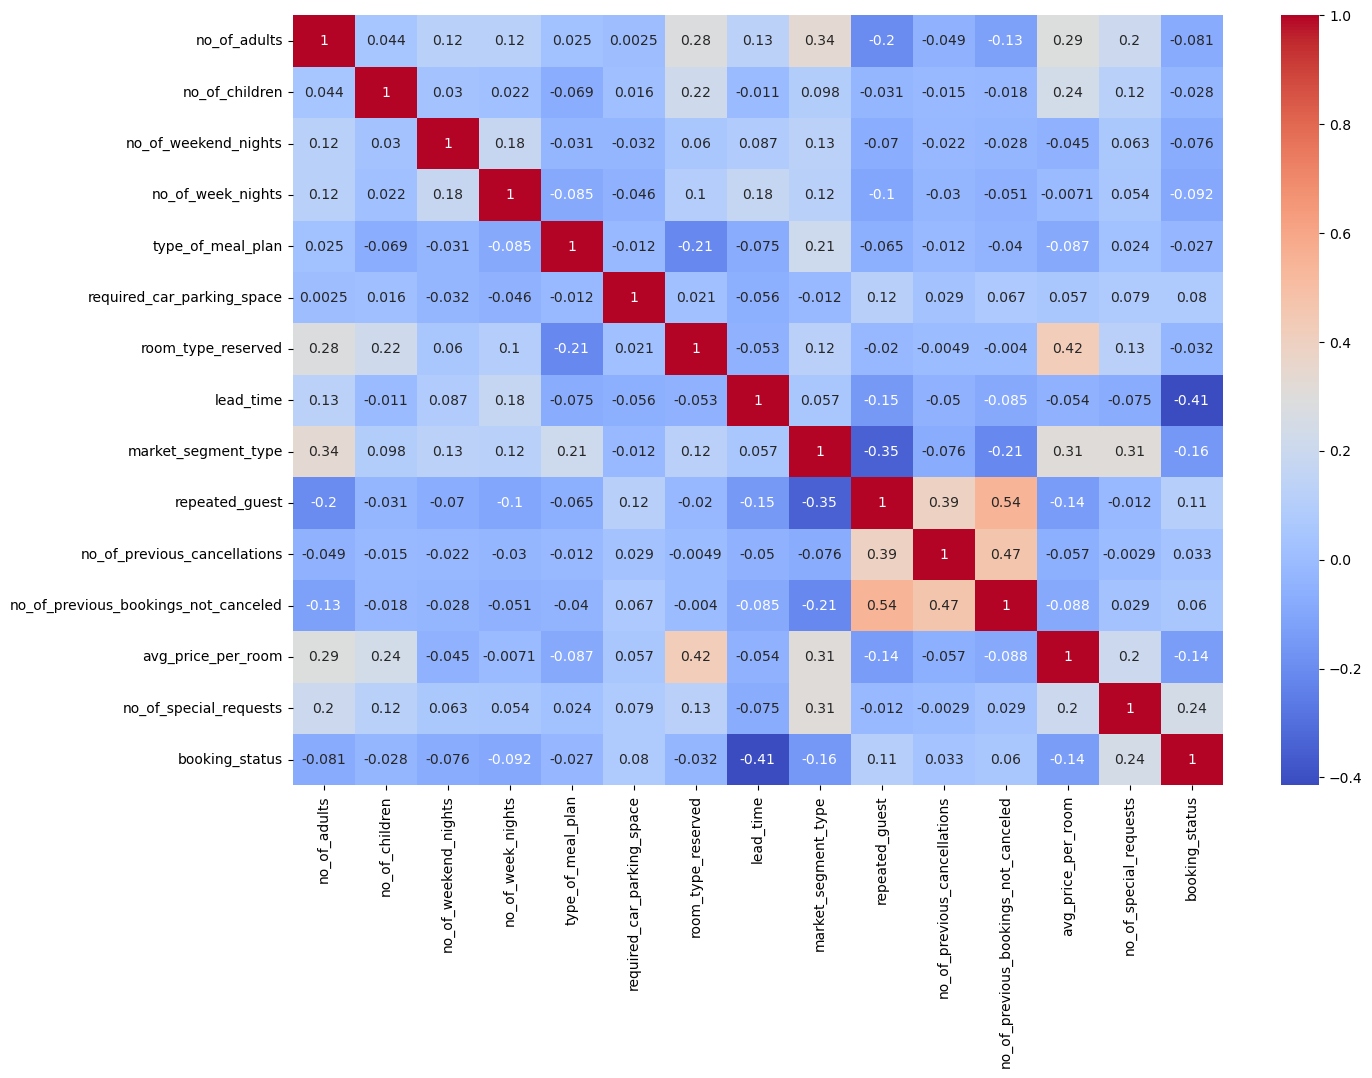

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [39]:
x= data.drop('booking_status', axis =1)
y= data['booking_status']

# Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state= 10, train_size=0.7)

# Model Building

I will be using the following classification models:

- Decision Tree Classifier
- Random Forest Classifier
- Logistic Regression
- Support Vector Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [106]:
grid_param = {'max_depth': [2,4,6,8],
              'min_samples_leaf': [2,4,6,8],
              'min_samples_split': [2,4,6,8],
              'criterion': ['gini', 'entropy'],
              'random_state': [0,42]

}

In [107]:
grid_search = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid= grid_param, cv =5,
                           scoring = 'accuracy', n_jobs= -1)

In [108]:
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'random_state': [0, 42]},
             scoring='accuracy')

In [109]:
best_params = grid_search.best_params_
print('Best Parameters: ',best_params)

Best Parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 0}


In [110]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2, min_samples_split=8)

In [111]:
tree.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2,
                       min_samples_split=8)

In [112]:
d_pred = tree.predict(xtest)

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [114]:
print('accuracy:', accuracy_score(ytest,d_pred))

accuracy: 0.8488809665280254


In [115]:
confusion_matrix(ytest, d_pred)

array([[2281,  847],
       [ 679, 6291]], dtype=int64)

# Random Forest Classifier

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rfc = RandomForestClassifier(criterion= 'entropy', max_depth=8, min_samples_leaf=2, min_samples_split=8)

In [118]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2,
                       min_samples_split=8)

In [119]:
r_pred = rfc.predict(xtest)

In [120]:
print('Accuracy:', accuracy_score(ytest, r_pred))

Accuracy: 0.8465042582689641


In [121]:
confusion_matrix(ytest, r_pred)

array([[1942, 1186],
       [ 364, 6606]], dtype=int64)

# Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
grid_param = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'random_state' : [0,42]
}

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=grid_param, cv=5, n_jobs=-1)

grid_search.fit(xtrain, ytrain)

print(grid_search.best_params_)

{'C': 1000, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs'}


In [124]:
#logistic regression object with best parameters
logreg = LogisticRegression(C=1000, penalty='l2', random_state=0, solver='liblinear')

#Training the model
logreg.fit(xtrain, ytrain)

#Training accuracy
print(logreg.score(xtrain, ytrain))

#Predicting the test set results
l_pred = logreg.predict(xtest)

0.7968166383701188


In [125]:
confusion_matrix(ytest, l_pred)

array([[1731, 1397],
       [ 688, 6282]], dtype=int64)

# Distribution Plot for all the model between Actual & Predicted

<AxesSubplot:title={'center':'Logistic Regression'}, xlabel='booking_status', ylabel='Density'>

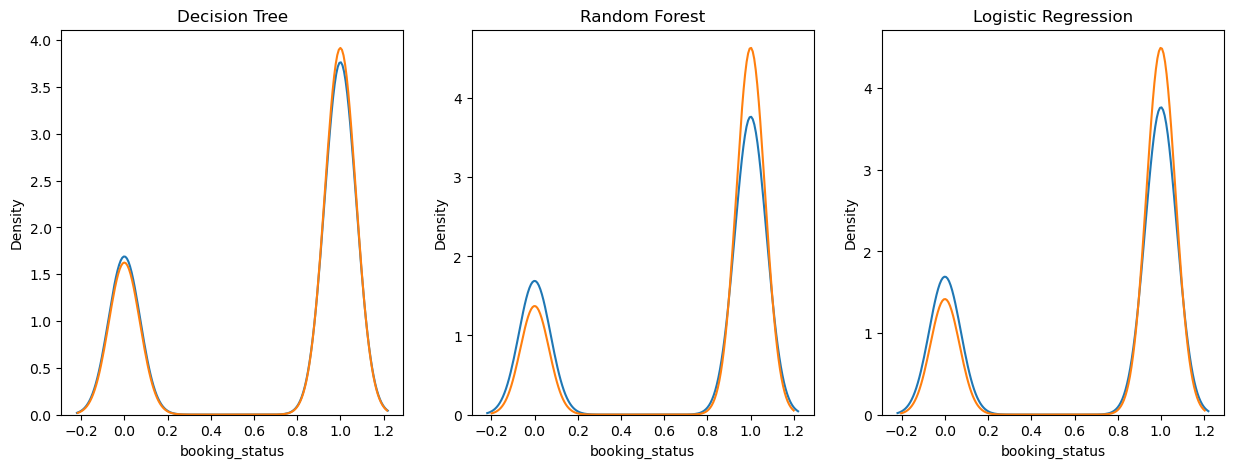

In [126]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.distplot(ytest, hist= False).set_title('Decision Tree')
sns.distplot(d_pred, hist = False)

plt.subplot(1,3,2)
sns.distplot(ytest,  hist= False).set_title('Random Forest')
sns.distplot(r_pred,  hist = False)

plt.subplot(1,3,3)
sns.distplot(ytest,  hist= False).set_title('Logistic Regression')
sns.distplot(l_pred, hist = False)

# Classification Report

In [127]:
from sklearn.metrics import classification_report

#decision tree
print('Decision Tree')
print(classification_report(ytest, d_pred))
#random forest
print('Random Forest')
print(classification_report(ytest, r_pred))
#logistic regression
print('Logistic Regression')
print(classification_report(ytest, l_pred))

Decision Tree
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      3128
           1       0.88      0.90      0.89      6970

    accuracy                           0.85     10098
   macro avg       0.83      0.82      0.82     10098
weighted avg       0.85      0.85      0.85     10098

Random Forest
              precision    recall  f1-score   support

           0       0.84      0.62      0.71      3128
           1       0.85      0.95      0.90      6970

    accuracy                           0.85     10098
   macro avg       0.84      0.78      0.80     10098
weighted avg       0.85      0.85      0.84     10098

Logistic Regression
              precision    recall  f1-score   support

           0       0.72      0.55      0.62      3128
           1       0.82      0.90      0.86      6970

    accuracy                           0.79     10098
   macro avg       0.77      0.73      0.74     10098
weighted avg       0.79   

# Model Metrics

In [128]:
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error

In [129]:
print('Decision Tree')
print('Accuracy Score: ', accuracy_score(ytest, d_pred))
print('Mean Absolute Error: ', mean_absolute_error(ytest, d_pred))
print('Mean Squared Error: ', mean_squared_error(ytest, d_pred))

print('\n')

#random forest
print('Random Forest')
print('Accuracy Score: ', accuracy_score(ytest, r_pred))
print('Mean Absolute Error: ', mean_absolute_error(ytest, r_pred))
print('Mean Squared Error: ', mean_squared_error(ytest, r_pred))

print('\n')

#logistic regression
print('Logistic Regression')
print('Accuracy Score: ', accuracy_score(ytest, l_pred))
print('Mean Absolute Error: ', mean_absolute_error(ytest, l_pred))
print('Mean Squared Error: ', mean_squared_error(ytest, l_pred))

Decision Tree
Accuracy Score:  0.8488809665280254
Mean Absolute Error:  0.15111903347197464
Mean Squared Error:  0.15111903347197464


Random Forest
Accuracy Score:  0.8465042582689641
Mean Absolute Error:  0.15349574173103586
Mean Squared Error:  0.15349574173103586


Logistic Regression
Accuracy Score:  0.7935234699940582
Mean Absolute Error:  0.20647653000594177
Mean Squared Error:  0.20647653000594177


Text(0.5, 1.0, 'Mean Squared Error')

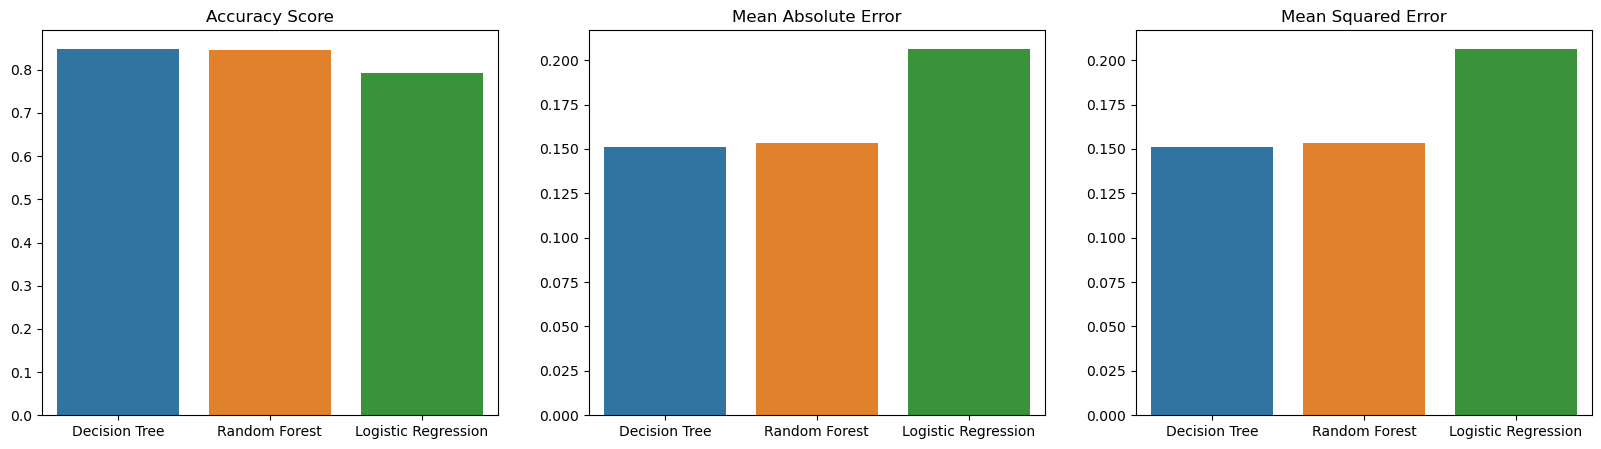

In [130]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
#Accuracy Score
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], 
            y = [accuracy_score(ytest, d_pred), accuracy_score(ytest, r_pred), accuracy_score(ytest, l_pred)], ax=ax[0]).set_title('Accuracy Score')
#Mean Absolute Error
sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'],
            y = [mean_absolute_error(ytest, d_pred), mean_absolute_error(ytest, r_pred), mean_absolute_error(ytest, l_pred)], ax=ax[1]).set_title('Mean Absolute Error')
#Mean Squared Error

sns.barplot(x = ['Decision Tree', 'Random Forest', 'Logistic Regression'], 
            y = [mean_squared_error(ytest, d_pred), mean_squared_error(ytest, r_pred), mean_squared_error(ytest, l_pred)], ax=ax[2]).set_title('Mean Squared Error')

# Feature Importance

Text(0.5, 1.0, 'Random Forest')

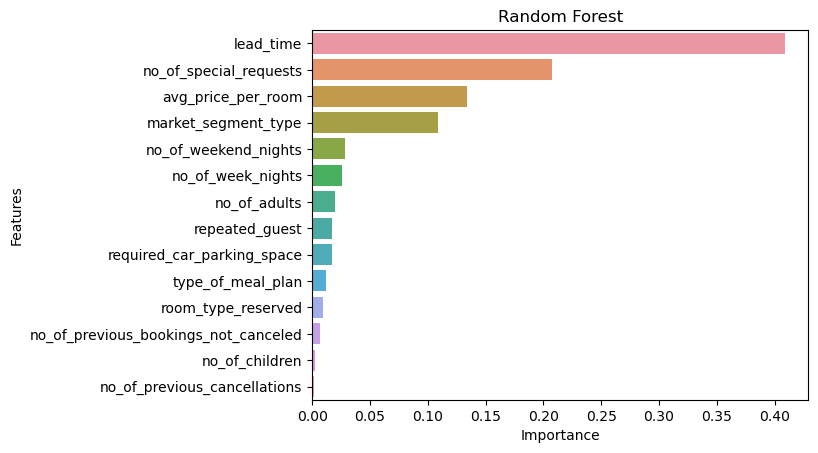

In [134]:
#decision tree
feature_importance = pd.DataFrame({'Features': xtrain.columns, 'Importance': rfc.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance).set_title('Random Forest')

Text(0.5, 1.0, 'Decision Tree')

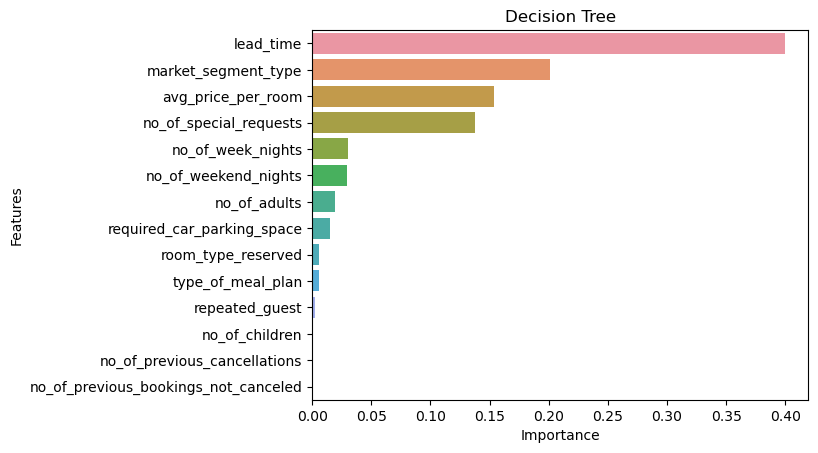

In [136]:
feature_importance = pd.DataFrame({'Features': xtrain.columns, 'Importance': tree.feature_importances_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance).set_title('Decision Tree')

# Conclusion

Coming to the classification models, I have used Decision Tree Classifier, Random Forest Classifier, Logistic Regression for predicting the reservation cancellation. The Decision Tree Classifier had the highest accuracy i.e. 84.88% among all the models.